# Data Cleaning and wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = pd.read_csv('marketing_customer_analysis.csv') # reading and editing showing the Dataframe
#display(file.head(10))
#display(file.tail())
file.shape

(10910, 26)

In [ ]:
cols = []                        # standardizing the header names
for column in file.columns:
    cols.append(column.lower())
cols
file.columns = cols
#file.head()
#file

In [ ]:
column_names1 = file.columns  # for visualizing the column headers
column_names1

In [ ]:
#file = file.rename(columns={'customer':'customer id',                # trying to rename columns in order to maximize space
                           # 'customer lifetime value':'client value', 
                            #'education':'education', 'gender':'gender',
                            #'income':'income', 'monthly premium auto':'premium auto', 
                             #'number of open complaints':'open cases','total claim amount': 'total claims', 
                             #'st':'state', 'vehicle class': 'vehicle class'})

In [8]:
#file.dtypes        # checking the data types of the columns

In [9]:
#file.select_dtypes(include ='number') # numerical data # numerical data

In [10]:
#numerical.fillna(0, inplace = True)
#numerical.isna().sum()

In [11]:
#file.select_dtypes(include = object) # categorical data

In [12]:
file.isna().values.any() # checking if NaN values exist

True

In [13]:
file.isna().sum() # calculating the number of NaN values column by column

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [14]:
file['vehicle type'].value_counts(dropna = False) # checing NAN for vehicle types

vehicle type
NaN    5482
A      5428
Name: count, dtype: int64

In [15]:
file['vehicle type'] = file['vehicle type'].fillna('M')  # filing NaNs for vehicle types
file['vehicle type'].value_counts(dropna = False)

vehicle type
M    5482
A    5428
Name: count, dtype: int64

In [16]:
file=file.drop(columns=['unnamed: 0'])  # drop a column  
file=file.dropna()   # drop rows with nan values
file.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [17]:
file['effective to date'] = pd.to_datetime(file['effective to date']) # extracting date-months from date

#file.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_11920\2460974267.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['effective to date'] = pd.to_datetime(file['effective to date']) # extracting date-months from date


In [18]:
file['month'] = file['effective to date'].dt.month # extracting month from datetime
#file

#months_to_filter = [1, 2, 3]                          # filtering by months; januanry to March only
#file[file['month'].isin(months_to_filter)]
#file

In [19]:
#file.rename(columns = lambda x: x.replace(" ", "_")) # lambda function for camel naming

In [20]:
def clean_data(file):
    file.columns=[e.lower().replace(' ', '_') for e in file.columns]
    #file=file.drop(columns=['unnamed: 0','vehicle_type'])
    file=file.dropna()
    file['effective_to_date']=pd.to_datetime(file['effective_to_date'], errors='coerce')
    file['month'] = file['effective_to_date'].dt.month
    return file

In [21]:
file1 = clean_data(file)

In [22]:
file1.shape

(9134, 26)

# Exploratory Data Anaiysis

In [23]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2


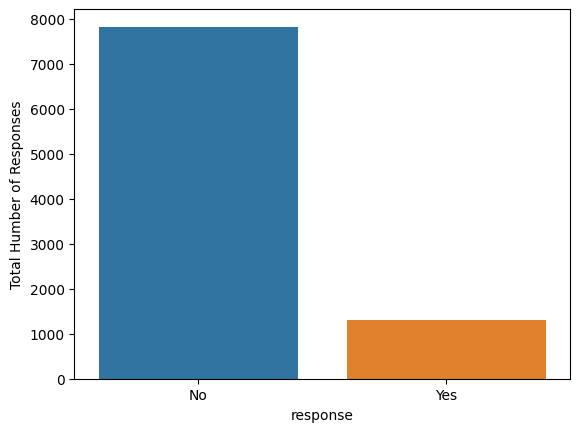

In [24]:
sns.countplot(x = 'response', data = file1) # response graph
plt.ylabel('Total Humber of Responses')
plt.show()

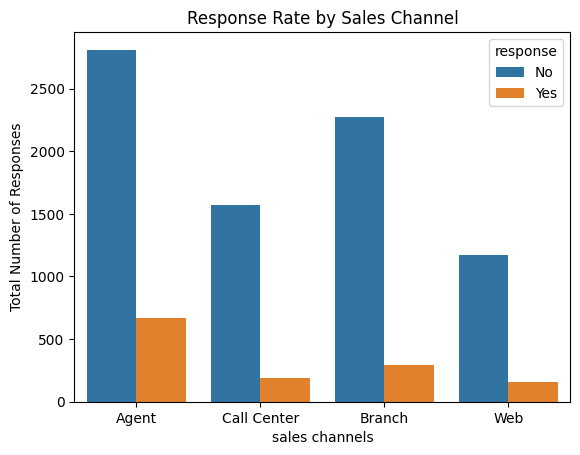

In [25]:
sns.countplot(x = 'sales_channel', hue = 'response', data = file1) # response by total sales amount
plt.ylabel('Total Number of Responses')
plt.xlabel('sales channels')
plt.legend(title = 'response')
plt.title('Response Rate by Sales Channel')
plt.show()

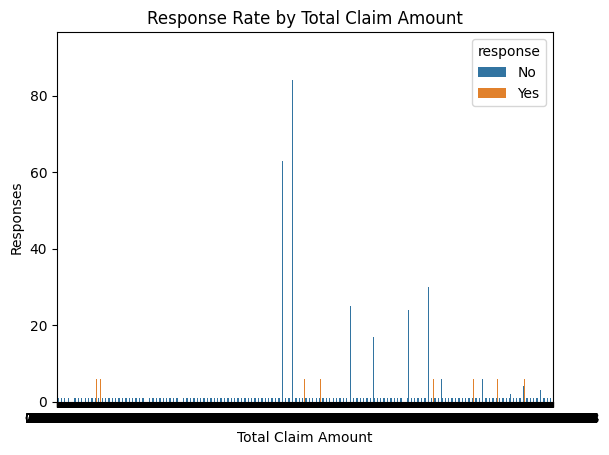

In [26]:
sns.countplot(x = 'total_claim_amount', hue = 'response', data = file1) # response by total claim amount
plt.ylabel('Responses')
plt.xlabel('Total Claim Amount')
plt.legend(title = 'response')
plt.title('Response Rate by Total Claim Amount')
plt.show()

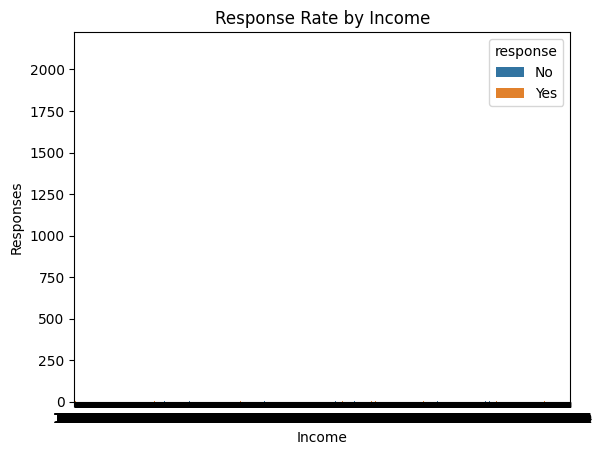

In [27]:
sns.countplot(x = 'income', hue = 'response', data = file1) # response by income is refusing to present a good result
plt.ylabel('Responses')
plt.xlabel('Income')
plt.legend(title = 'response')
plt.title('Response Rate by Income')
plt.show()

# Checking The Normality of the Data

In [28]:
file1.dtypes  

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [29]:
numerical = file1.select_dtypes(np.number) # extracting numerical data from the main data for analyses
#numerical

In [30]:
categorical = file1.select_dtypes(object)     # extracting categorical data
#categorical

In [31]:
numerical.describe().T # transposing the data for further analyses especially with respect to correlation 

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [32]:
numerical.head()   # headings of the numerical data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


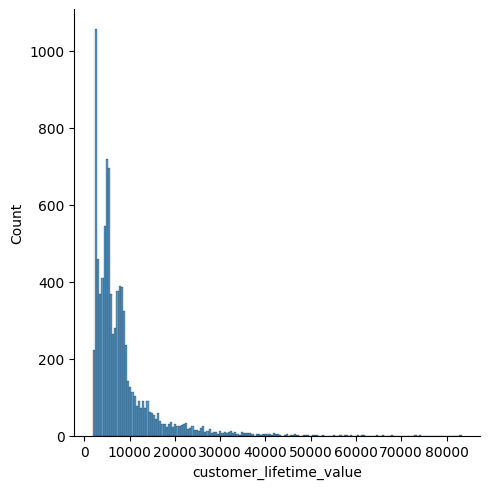

In [33]:
sns.displot(numerical['customer_lifetime_value']) # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
plt.show()

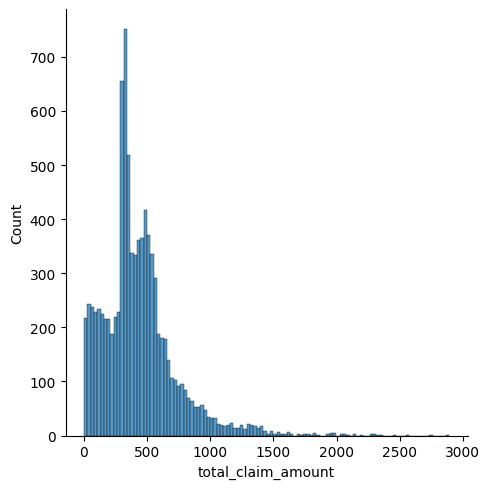

In [34]:
sns.displot(numerical['total_claim_amount'])    # distribution for 'Total Claim Amount'
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

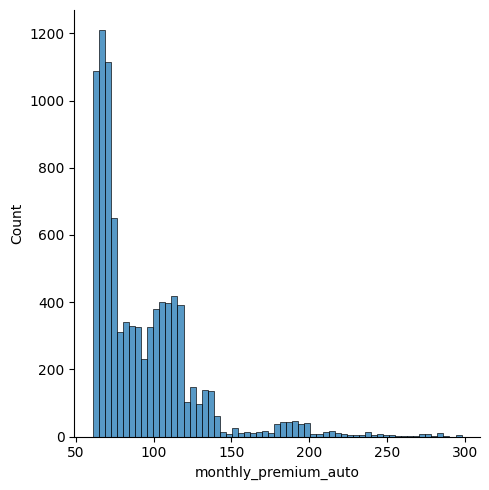

In [35]:
sns.displot(numerical["monthly_premium_auto"]) # distribution for 'Monthly Premium Auto'
plt.show

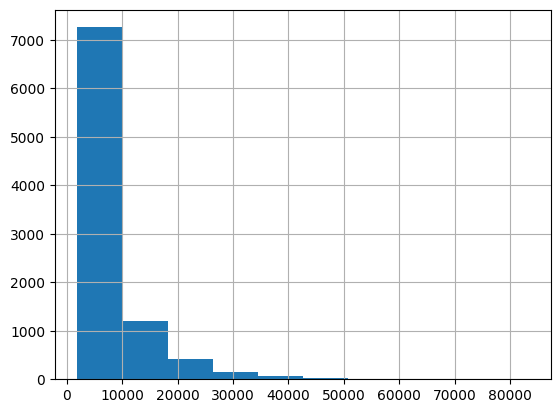

In [36]:
numerical['customer_lifetime_value'].hist()      # histogrm for 'Customer Lifetime Value'
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

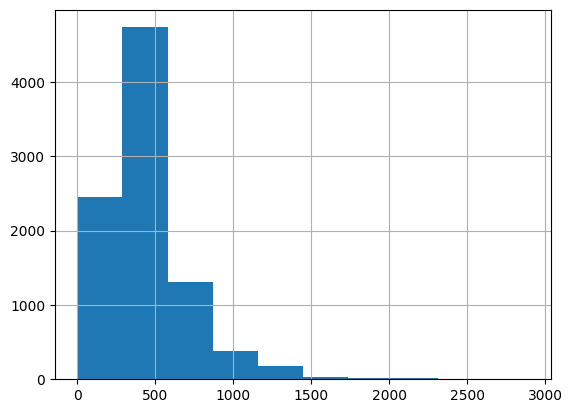

In [37]:
numerical["total_claim_amount"].hist()                    # histogrm for 'Total Claim Amount'
plt.show

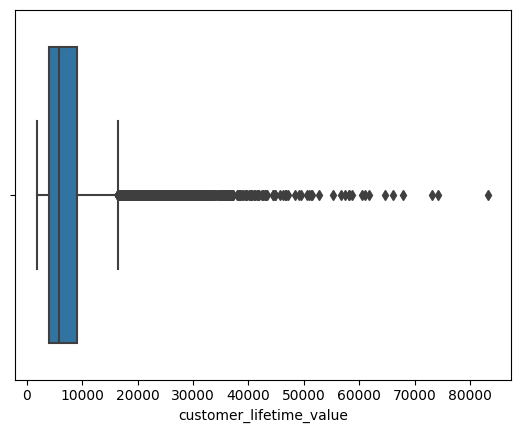

In [38]:
sns.boxplot(x=numerical['customer_lifetime_value'])  # boxplot for the assessment of errors in the data using the upper and lower limits as thresholds for determining outliers
plt.show()

In [39]:
iqr = np.percentile(numerical['customer_lifetime_value'],75) - np.percentile(numerical['customer_lifetime_value'],25)
upper_limit = np.percentile(numerical['customer_lifetime_value'],75) + 0.44*iqr
lower_limit = np.percentile(numerical['customer_lifetime_value'],25) - 0.00045*iqr # finding upper and lower limits to used in refining the results

In [40]:
iqr

4967.915247000001

In [41]:
upper_limit

11148.04974993

In [42]:
lower_limit

3992.01623238885

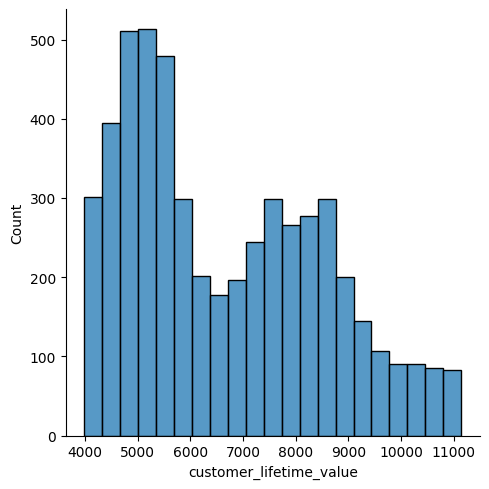

In [43]:
numerical1 = numerical[(numerical['customer_lifetime_value']>lower_limit) & (numerical['customer_lifetime_value']<upper_limit)].copy()
sns.displot(numerical1['customer_lifetime_value'])
plt.show()   # applying the result to determine if the data can is normally distributed after cleaning; but not so good

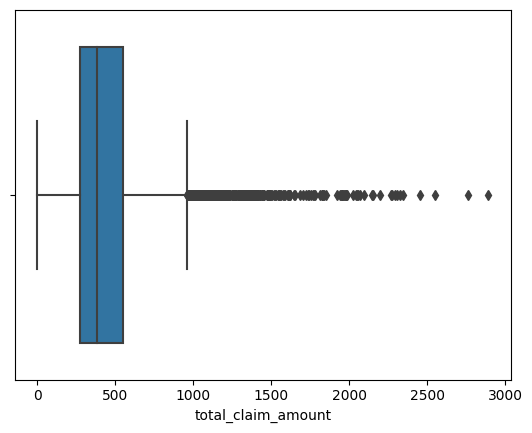

In [44]:
sns.boxplot(x=numerical['total_claim_amount'])    # boxplot for 'Total Claim Amount'
plt.show()

In [45]:
iqr = np.percentile(numerical['total_claim_amount'],75) - np.percentile(numerical['total_claim_amount'],25)
upper_limit = np.percentile(numerical['total_claim_amount'],75) + 0.9*iqr
lower_limit = np.percentile(numerical['total_claim_amount'],25) - 0.51*iqr   # same as above, but for 'Total Claim Amount'

In [46]:
upper_limit

795.2457735749999

In [47]:
lower_limit

131.8773814325

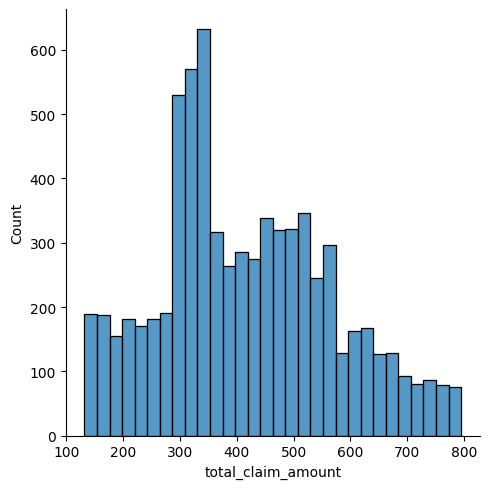

In [48]:
numerical1 = numerical[(numerical['total_claim_amount']>lower_limit) & (numerical['total_claim_amount']<upper_limit)].copy()
sns.displot(numerical1['total_claim_amount'])   # normality not so good
plt.show()

In [49]:
numerical1 = numerical.drop("total_claim_amount", axis = 1) # 'Total Claim Amount' dropped from DataFrame in order to use only the features alone for further nalyses and prediction
numerical1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
6,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1
10904,19228.463620,0,187,14.0,32,0.0,2,2
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2


In [50]:
correlations_matrix = numerical1.corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


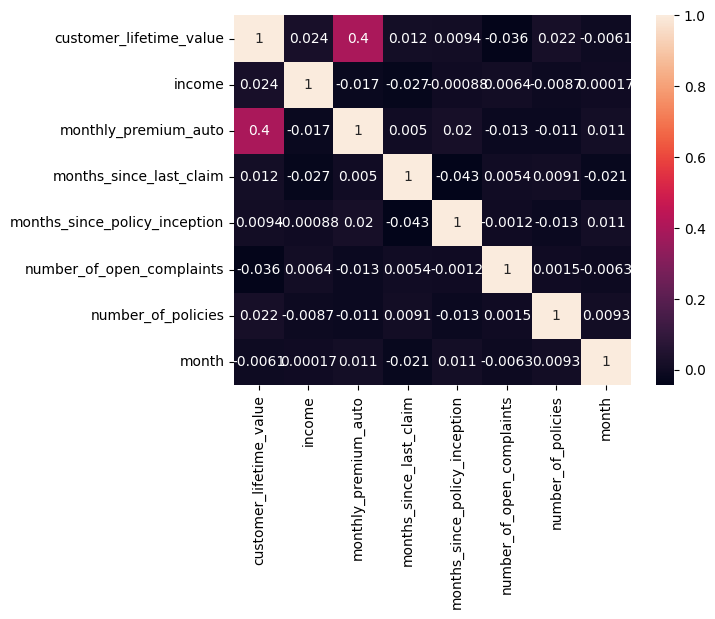

In [51]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation. with black showing the least correlated pairs. Correlation here is very low for all except self correlated pairs 
plt.show()

# Splitting and Scaling the Data

In [64]:
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler # # importing libraries for trnaformation
from sklearn.preprocessing import StandardScaler

In [65]:
y = numerical['total_claim_amount']                       #splitting X and y
X = numerical.drop(['total_claim_amount'], axis=1)
#X.fillna(0, inplace = True)
X_num = X.select_dtypes(include = np.number)
X_cat = categorical.select_dtypes(include = object) 

# Using an Alternative Transformer (Standard Scaler)

In [66]:
#transformer = MinMaxScaler().fit(X_num) # normalising numerical
#x_normalized = transformer.transform(X_num)
#print(x_normalized.shape)
#x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)
#X = x_normalized

In [67]:
transformer = StandardScaler().fit(X_num) # alternative method for normalising the data
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,1.075304
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,-0.929969
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,1.075304
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,-0.929969
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,1.075304
...,...,...,...,...,...,...,...,...
9129,-0.761692,0.730708,-0.558602,1.479543,1.216128,3.971744,-0.822648,-0.929969
9130,1.633560,-1.239617,2.725701,-0.108908,-0.575700,-0.422250,-0.404247,1.075304
9131,-0.399601,0.773205,-0.820183,-0.803856,0.714416,-0.422250,1.269358,-0.929969
9132,2.312518,0.071749,3.132606,-0.406743,0.535234,-0.422250,-0.404247,1.075304


In [68]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,3.733967e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,7.234560e-17,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly_premium_auto,9134.0,-1.524703e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months_since_last_claim,9134.0,4.239608e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months_since_policy_inception,9134.0,1.034620e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number_of_open_complaints,9134.0,6.378860e-17,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number_of_policies,9134.0,-2.761579e-17,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
month,9134.0,-2.605998e-17,1.000055,-0.929969,-0.929969,-0.929969,1.075304,1.075304


# Applying the Linear Regression Model and Error Analysis

In [69]:
import matplotlib.pyplot as pls
from sklearn.model_selection import train_test_split
X = x_standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # new train test ration

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5480, 8)
(3654, 8)
(5480,)
(3654,)


In [77]:
X_train.head()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [78]:
y_train.head()

1495    532.800000
3541    386.599797
801     207.510821
3994    331.116399
5817    975.107098
Name: total_claim_amount, dtype: float64

In [79]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5127433327108712

In [81]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5261474194093828

In [82]:
y_test[:5]

855     456.523850
52      406.902001
4816    128.516525
1844    110.868874
4457    106.737787
Name: total_claim_amount, dtype: float64

In [83]:
predictions_test[:5]

array([640.74485934, 231.86745849, 165.42429184, 174.34190494,
       199.03526695])

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error


In [85]:
mse=mean_squared_error(y_test,predictions_test)
mse

40151.69768730665

In [86]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

200.37888533302768

In [87]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

144.38536327954333


In [88]:
r2 = r2_score(y_test, predictions_test)
r2

0.5261474194093828

# Applying the Log Transform on the Test and Getting the New Error Logs

In [89]:
y_test_log = np.log(y_test)
y_test_log

855     6.123641
52      6.008572
4816    4.856057
1844    4.708348
4457    4.670375
          ...   
8599    4.947482
6059    2.214861
3170    3.336709
508     5.624833
9330    6.132964
Name: total_claim_amount, Length: 3654, dtype: float64

In [90]:
y_pred_log = np.log(predictions_test)   # log transform
y_pred_log

array([6.46263134, 5.44616591, 5.10851364, ..., 5.02438609, 5.81828994,
       6.00439751])

In [91]:
mse=mean_squared_error(y_test_log, y_pred_log) 
mse

0.6820058668730393

In [92]:
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
rmse

0.8258364649693299

In [93]:
mae = mean_absolute_error(y_test_log, y_pred_log)
print(mae)

0.49165582685264986


In [94]:
r2 = r2_score(y_test_log, y_pred_log)
r2

0.18797421622681154